<a href="https://colab.research.google.com/github/Laura-Neff/RegressionUsingNeuralNetworks/blob/main/RegressionUsingNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

#Use PyTorch to set up neural networks to predict data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
advertising_data = pd.read_csv('Advertising.csv', index_col=0)

advertising_data.sample(10)

,TV,radio,newspaper,sales
188,191.1,28.7,18.2,17.3
126,87.2,11.8,25.9,10.6
92,28.6,1.5,33.0,7.3
161,172.5,18.1,30.7,14.4
104,187.9,17.2,17.9,14.7
34,265.6,20.0,0.3,17.4
110,255.4,26.9,5.5,19.8
116,75.1,35.0,52.7,12.6
148,243.2,49.0,44.3,25.4
152,121.0,8.4,48.7,11.6


In [ ]:
advertising_data.shape

(200, 4)

In [ ]:
from sklearn import preprocessing

In [ ]:
advertising_data[['TV']] = preprocessing.scale(advertising_data[['TV']])
advertising_data[['radio']] = preprocessing.scale(advertising_data[['radio']])
advertising_data[['newspaper']] = preprocessing.scale(advertising_data[['newspaper']])

#neural networks work better when you have very small numbers and they're all in the same range; so scale it 

In [ ]:
advertising_data.sample(10)

,TV,radio,newspaper,sales
110,1.265277,0.245516,-1.153281,19.8
146,-0.078731,-1.442573,-0.992170,10.3
176,1.516330,1.731034,0.517674,27.0
87,-0.826052,0.286030,-0.669947,12.0
65,-0.186159,1.319140,-0.076137,18.0
53,0.809879,1.244864,0.416404,22.6
3,-1.516155,1.528463,1.783549,9.3
145,-0.593682,-0.571519,0.384182,11.4
60,0.743321,0.421077,-0.978360,18.4
36,1.677471,-1.294022,-1.015186,12.8


In [ ]:
X = advertising_data.drop('sales', axis=1)

Y = advertising_data[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, y_train.shape

((160, 3), (160, 1))

In [ ]:
x_test.shape, y_test.shape

((40, 3), (40, 1))

###Converting data in pytorch tensors
- tensors are matrix representations/multidimensional arrays PyTorch uses that can be loaded on a GPU device to run distributed processing

In [ ]:
import torch

In [ ]:
x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [ ]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [ ]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 3]), torch.Size([40, 1]))

##Define the parameters for the neural network
- inp = number of features we are using
- out will be used to set the size of the output from the neural network. We only predict a single price for each car, so this will be 1
- hid is used to set the number of neurons in our hidden layer
- loss_fn is MSELoss since we're performing a linear regression
learning_rate is set to 0.0001

In [ ]:
inp = 3 #we want to input/use 3 features
out = 1 #output 1 label/output

hid = 100 #100 hidden neurons in hidden layer

loss_fn = torch.nn.MSELoss() #mean square error loss

learning_rate = 0.0001 #learning rate that you use during training will determine how much your model will learn for your data for every epoch
#epoch = one pass your model makes through entire dataset

- nn.Sequential: Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

- nn.Linear: Applies a linear transformation to the incoming data: y=Ax+b
parameters:
in_features – size of each input sample out_features – size of each output sample bias – If set to False, the layer will not learn an additive bias. Default: True

- Sigmoid : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hid, out))

#now we set up fully connected neural network

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#optimize model's parameters during training 
#model params need to converge to their final values

Training Model
- Foward Pass:

Predicting Y with input data X
Finding Loss:

- Finding difference between Y_train_tensor and Y_pred using MSEloss function defined above

- Back Propogation:

   starting with zero gradients before back propogation
back propogation is done by simply loss.backward() function

- Manually updating model parameters

   weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
model.parameter() returns all the weights and biases of parameters
reducing weight with multiple of learning rate and gradient

In [ ]:
for iter in range(10000): #iterate through entire dataset 10,000 times
    
    y_pred = model(x_train_tensor) #make forward pass to get model parameters' current predictions 
    loss = loss_fn(y_pred, y_train_tensor) #calculate loss between those predictions and the actual values -- how far actual vals are from predicted

    if iter % 1000 ==0: #every thousand iterations will print out the current value of loss to the screen so that we can see that model is converging
        print(iter, loss.item())
    
    optimizer.zero_grad() #now calculate gradients 
    loss.backward() #gradients allow us to update model's parameters to improve model
    
    optimizer.step() #this actually updates model's parameters

0 227.5751953125
1000 127.34938049316406
2000 34.98806381225586
3000 9.296917915344238
4000 6.561415195465088
5000 4.888665199279785
6000 3.394355058670044
7000 2.215470790863037
8000 1.3635530471801758
9000 0.8045110702514648


###Using our model for predictions

We pick one of the ads from the test data set for prediction of sale

In [ ]:
sample = x_test.iloc[14]
sample

TV          -0.824884
radio        0.232011
newspaper   -0.379947
Name: 81, dtype: float64

###We convert these features to a Pytorch tensor

In [ ]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)
sample_tensor

tensor([-0.8249,  0.2320, -0.3799])

###Compare the actual and predicted sale
The predicted sale is very close to its actual sale

In [ ]:
y_pred = model(sample_tensor)

print("Predicted sale : ", int(y_pred.item()))
print("Actual sale : ", int(y_test.iloc[23]))

Predicted sale :  10
Actual sale :  12


###Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [ ]:
y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:5]

#get the first 5 predicted values for y_test and store in tensor

tensor([[ 9.9918],
        [ 8.2900],
        [ 9.0824],
        [25.8770],
        [11.5724]], grad_fn=<SliceBackward0>)

###The tensor is converted to a numpy array

In [ ]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:5]

#how to convert tensor to NumPy format

array([[ 9.991844],
       [ 8.290011],
       [ 9.082369],
       [25.877003],
       [11.57242 ]], dtype=float32)

###Plot a graph of the predicted values against the actual ones
The good news is there appears to be a strong positive correlation

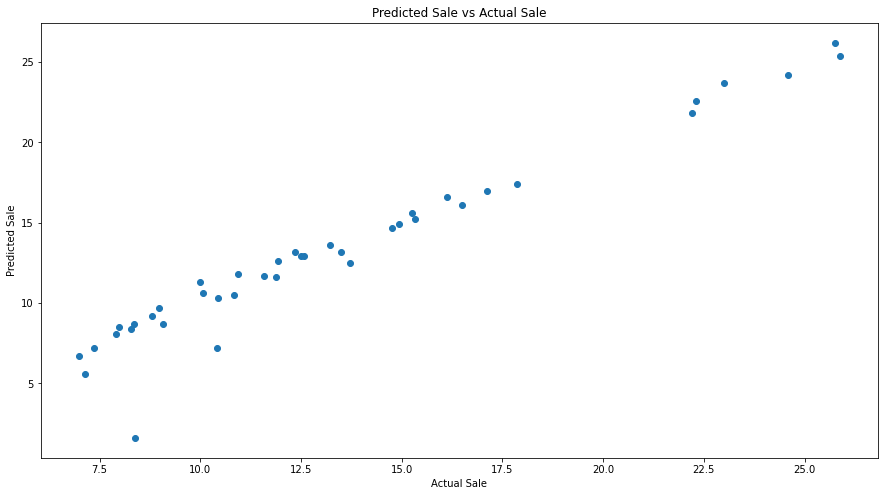

In [ ]:
plt.figure(figsize=(15, 8))

plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

#actual values are very close to the predicted values

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#very good model

0.9457405156679746